# Support Vector Machine (SVM) 
* capable of performing linear or nonlinear classification, regression, and even outlier detection.
* well suited for classfication of complex small- medium-sized datasets

## Linear SVM Classification
two classes can be clearly separated with a straight line (linearly separable) 

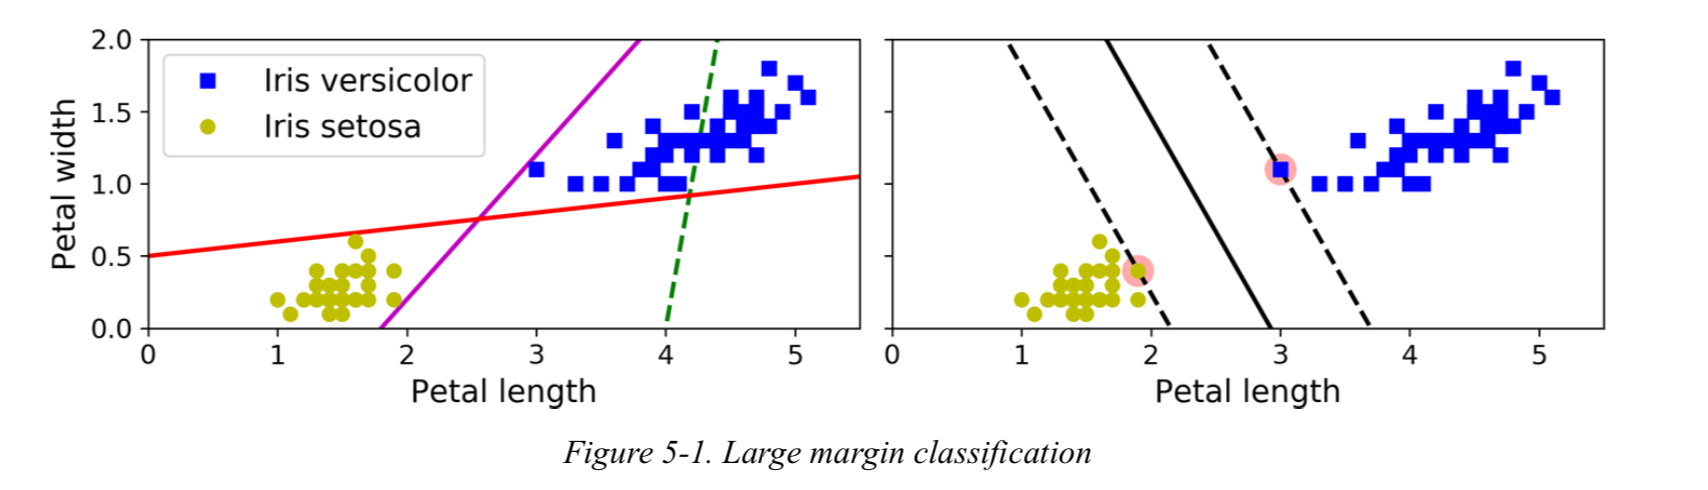

Left: Shows 3 possible classifiers
* Green (dashed-line) does not classify properly
* Red and purple classifies it into two classes
* The issue with the red and purple decision boundaries is that it is too close to the observations that any new data can affect the decision boundary or can misclassify it .


Right: large margin classifier (SVC)
* chooses a line that separates the classes AND stays as far away from the closest observations from each class 
* fitting the widest possible street between the two classes

### Support Vectors
* the observations that are used to create the "street" is called **support vectors**
* features need to be scaled because it it highly sensitive

### Hard Margin Classifier
* all observations are on either side of the separating line
* only works on data that is linearly separable (which is not always the case)
* very sensitive to outliers

### Soft Margin Classifier
* more flexible than hard margin 
* trade-off between keeping the "street" large as possible by softening the margin violations
* use hyperparameter, C, to adjust how much to violate the margin violations. high C makes it very strict, low C is more lenient

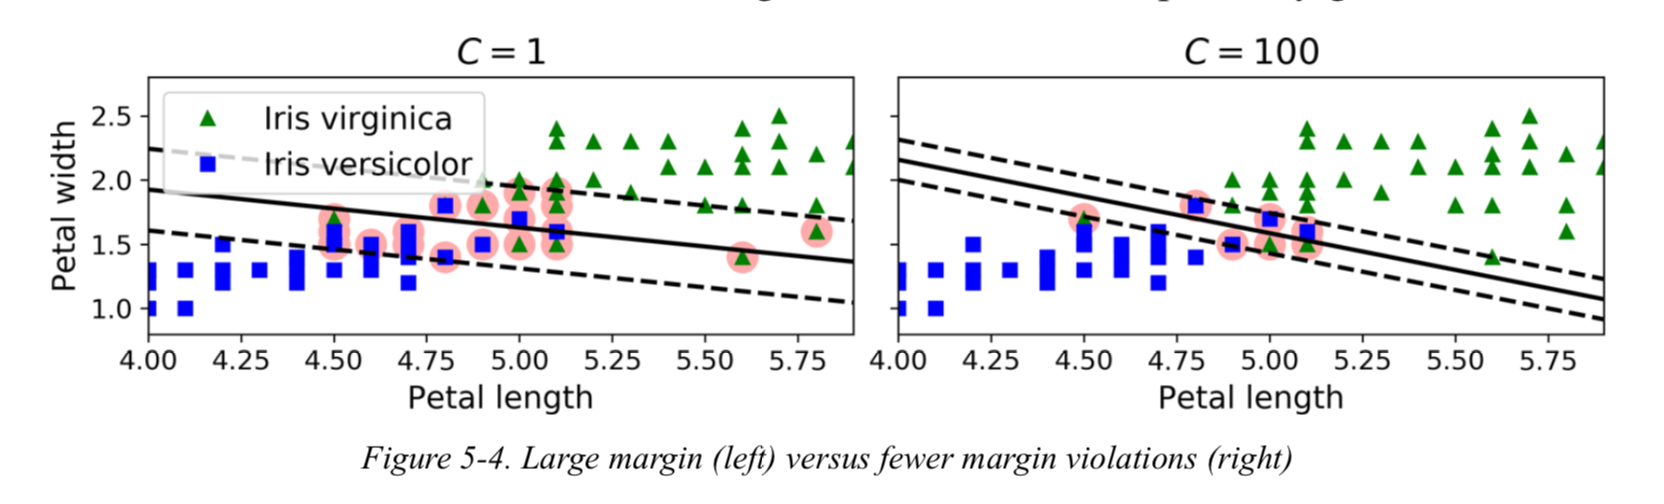

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
# Loading in the data

iris = datasets.load_iris()

# Getting petal length and petal width as the train data
X = iris["data"][:, (2, 3)]

# Setting the target as a boolean if it is virginica
y = (iris["target"] == 2).astype(np.float64)

In [3]:
# # Converting to pandas dataframe

# import pandas as pd

# pd_iris = pd.DataFrame(iris["data"], columns=iris['feature_names'])
# pd_iris['target'] = iris['target']
# pd_iris.head()

In [4]:
# Fitting SVC on iris dataset using a pipeline

## Creating a pipeline
svm_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("linear_svc", LinearSVC(C=1, loss='hinge')),
])

## Fitting using the pipeline
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [5]:
# Predicting on new data

svm_clf.predict([[5.5, 1.7]])

array([1.])

## Nonlinear SVM Classification

In [6]:
# Generating data that is nonlinear

## Imports
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Making moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

## Creating a poly pipeline
polynomial_svm_clf = Pipeline([
  ("poly_features", PolynomialFeatures(degree=3)),
  ("scaler", StandardScaler()),
  ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

## Fitting the data
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

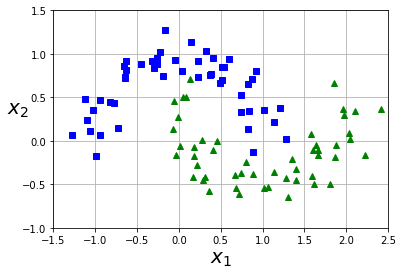

In [7]:
# Function that plots data

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

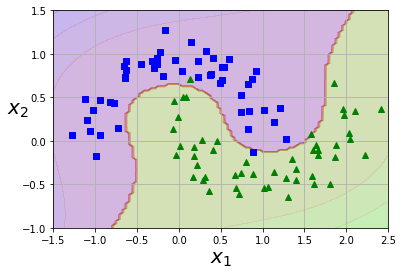

In [8]:
# Creating a function that plots predictions

def plot_predictions(clf, axes):
    
    ### Creates a data with 2 features
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]

    ### Getting the predictions
    y_pred = clf.predict(X).reshape(x0.shape)

    ### Creating decision boundary
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### Polynomial Kernel
* low polynomial features cannot deal with very complex datasets
* high polynomial features creates a huge number of features


kernel trick: get the same result as if adding many polynomial features without actually adding them

In [9]:
# Implementing SVM

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

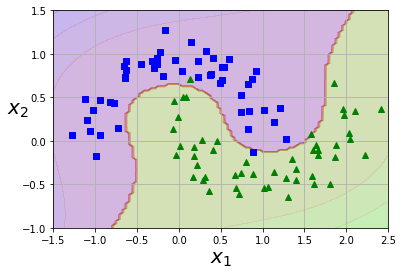

In [11]:
# Plotting the decision boundary

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

# Adding the data
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### Similiarity Features

* similiarity function: measures how much each instance resembles a particular landmark
* Gaussian RBF Kernel

In [12]:
# Fitting SVM with rbf kernel

rbf_kernel_svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Text(0.5, 1.0, 'y=5, C=0.001')

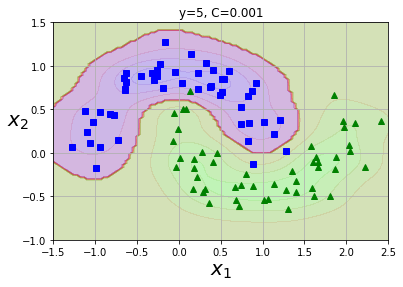

In [14]:
# Plotting data and decision boundary

plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

# Adding the data
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("y=5, C=0.001")

## SVM Regression
* tries to fit as many instances as possible on the street while limiting margin violations
* width of street is controlled by hyperparameter $\epsilon$


In [19]:
# Creating data

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [23]:
# Fitting SVR

from sklearn.svm import SVR

svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
# Plotting SVM Regression

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

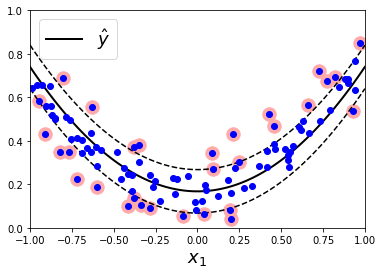

In [26]:
# Plotting data and decision boundary

plot_svm_regression(svm_reg, X, y, [-1, 1, 0, 1])